In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()
# print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# to get the info about our dataset wheather any column is empty or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# to check if there is any duplicated row
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
# After looking at the info we concluded that the first three columns are of no use and thus we will remove those
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Since there are some categorical datas in the data we will first have to change it into numerical data as well
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
# Here we will scale the model as some numbers are very big while the other are not so that model weights get converge quickly

X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [16]:
X_train.shape

(8000, 11)

In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
X_train.shape

(8000, 11)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# We do this so that we can transform the overall dataset and normalise their deviation such that they get 
# converged easily.

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# lets build sequential model
model = Sequential()

model.add(Dense(11,activation='relu', input_dim = 11))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224 (896.00 B)

 Trainable params: 224 (896.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [24]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7551 - loss: 0.6052 - val_accuracy: 0.7975 - val_loss: 0.5040
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.4856 - val_accuracy: 0.8012 - val_loss: 0.4523
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8157 - loss: 0.4294 - val_accuracy: 0.8125 - val_loss: 0.4334
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8163 - loss: 0.4232 - val_accuracy: 0.8219 - val_loss: 0.4201
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8316 - loss: 0.3981 - val_accuracy: 0.8294 - val_loss: 0.4072
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8327 - loss: 0.4047 - val_accuracy: 0.8331 - val_loss: 0.3932
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 0.3797 - val_accuracy: 0.8369 - val_loss: 0.3822
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8452 - loss: 0.3743 - val_accu

In [25]:
model.layers[0].get_weights()

[array([[ 2.04061970e-01,  1.83432341e-01, -1.10059552e-01,
          9.96445715e-02, -2.03229561e-01,  3.40784639e-01,
         -4.76330926e-04, -1.18961349e-01,  1.72062203e-01,
          6.43029884e-02,  3.74400586e-01],
        [ 8.15257668e-01, -3.01818848e-01, -2.04110473e-01,
          9.27471042e-01, -4.65509057e-01, -7.22358763e-01,
         -4.75630164e-02,  1.06515336e+00, -4.13513154e-01,
         -5.85550070e-02, -5.69123849e-02],
        [ 3.37145478e-02, -1.00984043e-02,  2.26544037e-01,
          2.15182215e-01,  2.76530534e-01,  3.62967223e-01,
          1.32649571e-01,  2.65088528e-01, -8.08214396e-03,
         -4.27640378e-02, -9.43358243e-02],
        [ 3.39471877e-01, -4.16038960e-01,  1.60807222e-01,
         -7.81268418e-01, -3.66722941e-01,  1.75717652e-01,
          2.37055957e-01, -2.91186590e-02, -1.14473373e-01,
          2.33452991e-01,  7.69774169e-02],
        [ 4.57515776e-01,  2.69632667e-01,  2.29870081e-01,
         -3.25437933e-01,  3.83383721e-01,  

In [26]:
model.layers[1].get_weights()

[array([[-0.14786634, -0.31651226,  0.631079  ,  0.35909185,  0.5097663 ,
         -1.3036637 ,  0.5831149 ],
        [ 0.0118402 ,  0.18180785,  0.15003291, -0.25442374, -0.44152635,
          0.24037397, -0.75587606],
        [ 0.63138086,  0.7751602 , -0.34275594,  0.24168116, -0.2481615 ,
         -0.29712042, -0.12709315],
        [ 0.29142213, -0.40329838,  0.32629436,  0.81275207, -0.5888231 ,
         -0.25855112,  0.267681  ],
        [ 0.22355206,  0.52409536,  0.32606336, -0.06158947,  0.14135289,
         -0.0960493 ,  0.33541262],
        [ 0.19709022, -0.5620708 ,  0.46463868, -0.46519908, -0.33143514,
          0.89164245, -0.4463193 ],
        [-0.64279103, -0.79714656, -0.66903836,  0.3501161 ,  0.95644397,
          0.11143533,  0.87057036],
        [ 0.89002794, -0.832637  ,  0.12353897, -0.95635635, -0.01887836,
         -1.628865  , -0.7534472 ],
        [ 0.4930227 ,  0.70588017,  0.26230833, -0.9676653 ,  0.4879231 ,
         -0.16974115, -0.0077039 ],
        [ 

In [27]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [28]:
y_pred = np.where(y_log>0.5,1,0)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8675

In [30]:
import matplotlib.pyplot as plt

In [31]:
history

In [32]:
history.history

{'accuracy': [0.7828124761581421,
  0.7993749976158142,
  0.811718761920929,
  0.8201562762260437,
  0.827343761920929,
  0.836718738079071,
  0.8440625071525574,
  0.8495312333106995,
  0.8526562452316284,
  0.8543750047683716,
  0.8556249737739563,
  0.8571875095367432,
  0.8570312261581421,
  0.8587499856948853,
  0.8590624928474426,
  0.8600000143051147,
  0.860156238079071,
  0.8604687452316284,
  0.8618749976158142,
  0.8631250262260437,
  0.8609374761581421,
  0.86328125,
  0.8610937595367432,
  0.8623437285423279,
  0.8629687428474426,
  0.8617187738418579,
  0.8628125190734863,
  0.8620312213897705,
  0.8639062643051147,
  0.8615624904632568,
  0.8634374737739563,
  0.8639062643051147,
  0.8626562356948853,
  0.864062488079071,
  0.8650000095367432,
  0.86328125,
  0.8637499809265137,
  0.8639062643051147,
  0.86328125,
  0.8639062643051147,
  0.8637499809265137,
  0.8637499809265137,
  0.8650000095367432,
  0.866406261920929,
  0.8656250238418579,
  0.8653125166893005,
  0.86

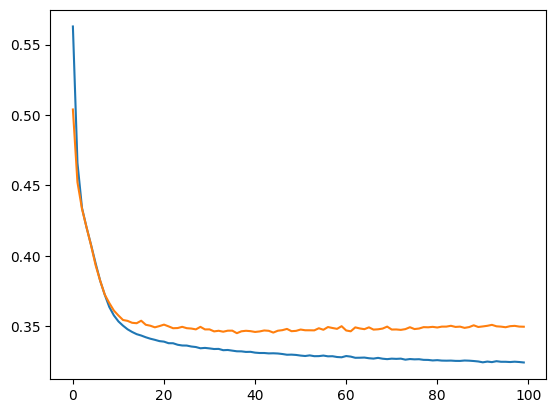

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

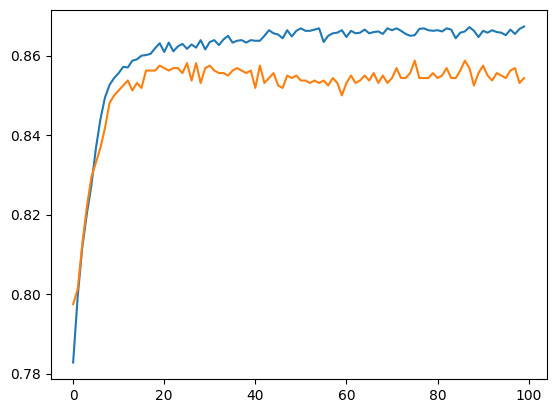

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [17]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,False,False,True
3850,680,34,3,143292.95,1,1,0,66526.01,False,False,True
4962,531,42,2,0.00,2,0,1,90537.47,False,False,False
3886,710,34,8,147833.30,2,0,1,1561.58,True,False,True
5437,543,30,6,73481.05,1,1,1,176692.65,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,False,True,False
162,800,49,7,108007.36,1,0,0,47125.11,False,False,False
7903,567,34,10,0.00,2,0,1,161571.79,False,True,True
2242,621,30,2,101014.08,2,1,1,165257.31,True,False,False
